# Create a Facetgrid RGB Plot

## Setup
Import the Xarray, then open the dataset.

In [1]:
import xarray as xr
import rioxarray

In [2]:
ds = xr.open_dataset('../Data/netCDF/ds_BM_NP.nc')
ds

<xarray.Dataset>
Dimensions:      (time: 36, y: 200, x: 170)
Coordinates:
  * y            (y) float64 4.466e+06 4.466e+06 ... 4.447e+06 4.447e+06
  * x            (x) float64 9.604e+06 9.604e+06 9.604e+06 ... 9.62e+06 9.62e+06
    spatial_ref  int32 ...
  * time         (time) datetime64[ns] 2018-01-31 2018-02-28 ... 2020-12-31
Data variables:
    nbart_red    (time, y, x) float32 ...
    nbart_blue   (time, y, x) float32 ...
    nbart_green  (time, y, x) float32 ...
    nbart_nir_1  (time, y, x) float32 ...
Attributes:
    crs:           EPSG:3308
    grid_mapping:  spatial_ref

## Create a Facetgrid RGB Plot

C:\Users\mjdea\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cm.py:489: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


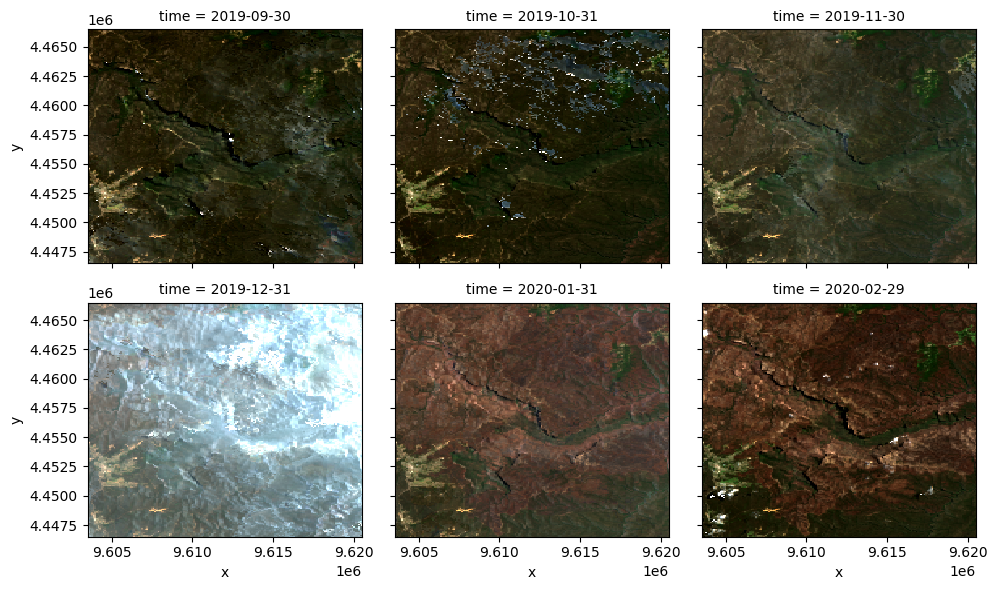

In [15]:
(ds[['nbart_red','nbart_green','nbart_blue']].sel(time=slice('2019-09', '2020-02')).
 to_dataarray().
 plot.imshow(col='time', col_wrap=3, robust=True))

## Plot a Multiple-band GeoTIFF
A multiple-band GeoTIFF can be read into a data array then plotted. This might require the selection of the appropriate bands to plot, depending on the file you are working with. In the example below, the bands are
1. Red
2. Blue
3. Green
4. NIR_1

where the data was sourced from Sentinel 2.

In [23]:
da = rioxarray.open_rasterio('Data/GeoTIFF/Multiple_Band/MultiBand_2019.tiff')
da

<xarray.DataArray (band: 4, y: 200, x: 170)>
[136000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 9.604e+06 9.604e+06 9.604e+06 ... 9.62e+06 9.62e+06
  * y            (y) float64 4.466e+06 4.466e+06 ... 4.447e+06 4.447e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

The `.sel()` command selects the red, green, and blue bands and places them in the order required to show a true-colour composite. The `figsize` parameter is used to set the size of the plot.

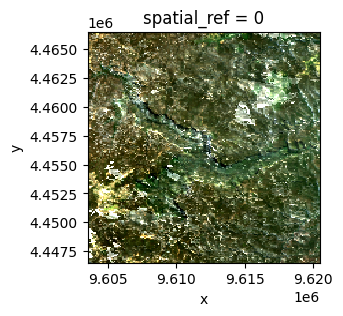

In [30]:
da.sel(band=[1,3,2]).plot.imshow(robust=True, figsize=(3,3))

## Create a Facetgrid False-colour Composite Plot
A false-colour composite can be created by selecting the appropriate bands before calling the `.imshow()` function. The following example shows the FCC produced by using the mapping
* Red = NIR_1
* Green = Red
* Blue = Green

where the left-hand side are the RGB channels of the image.

C:\Users\mjdea\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cm.py:489: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


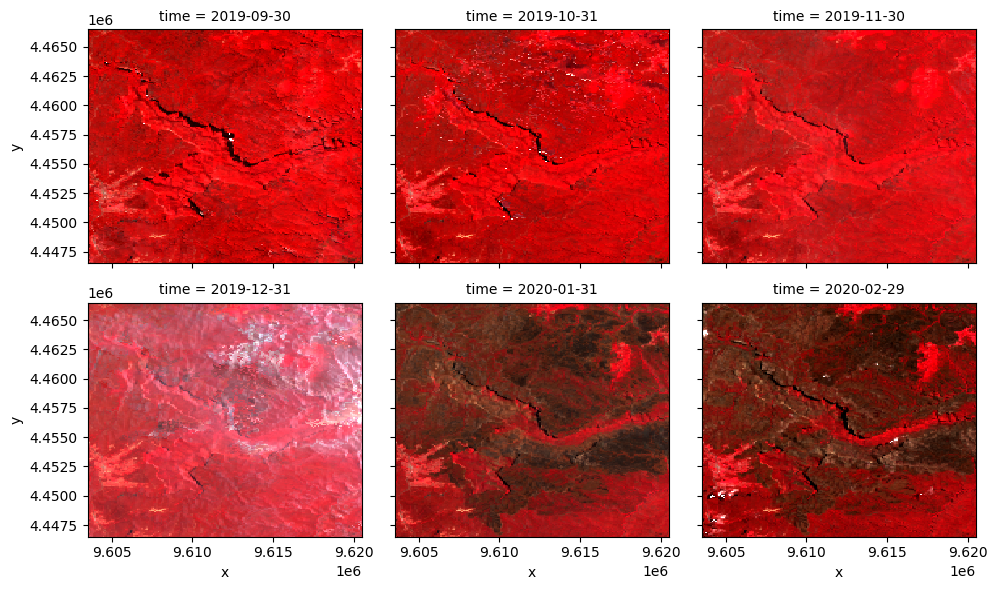

In [31]:
(ds[['nbart_nir_1','nbart_red','nbart_green']].sel(time=slice('2019-09', '2020-02')).
 to_dataarray().
 plot.imshow(col='time', col_wrap=3, robust=True))